In [1]:
import pandas as pd

data = pd.read_csv('data/dataset_processed.csv')
data.head()

,O,N,B,S,P,SSA,PV,Mic,Dap,ID/IG,Elyte,CC,AML,PW,CD,Cs
0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,0.939857,1.488390,1.029,2M ZnSO4,carbon cloth,1.0,1.6,0.10,85.0
1,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,0.931392,1.555961,1.038,2M ZnSO4,carbon cloth,1.0,1.6,0.10,114.0
2,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.10,90.2
3,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.25,86.3
4,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.50,79.9


In [2]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,O,N,B,S,P,SSA,PV,Mic,Dap,ID/IG,...,Elyte_2M ZnSO4,Elyte_3M Zn(CF3SO3)2,CC_carbon cloth,CC_freestanding,CC_graphite paper,CC_nickel foam,CC_stainless steel,CC_stainless-steel foil,CC_stainless-steel mesh,CC_titanium foil
0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,0.939857,1.488390,1.029,...,True,False,True,False,False,False,False,False,False,False
1,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,0.931392,1.555961,1.038,...,True,False,True,False,False,False,False,False,False,False
2,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.209302,3.015428,0.820,...,False,False,False,False,False,False,False,False,True,False
3,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.209302,3.015428,0.820,...,False,False,False,False,False,False,False,False,True,False
4,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,0.209302,3.015428,0.820,...,False,False,False,False,False,False,False,False,True,False


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def calculate_metrics(y_true, y_pred):
    """
    Calculate and return actual vs pred fig for data_dopants metrics.
    """
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    rmse = root_mean_squared_error(y_true, y_pred)
    return r2, mae, mape, rmse


def metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, model_name):
    R2_train, MAE_train, MAPE_train, RMSE_train = calculate_metrics(y_train, y_train_pred)
    R2_test, MAE_test, MAPE_test, RMSE_test = calculate_metrics(y_test, y_test_pred)
    metrics = {'model': model_name,
                   'R2_train': R2_train, 'MAE_train': MAE_train, 'MAPE_train': MAPE_train, 'RMSE_train': RMSE_train,
                   'R2_test': R2_test, 'MAE_test': MAE_test, 'MAPE_test': MAPE_test, 'RMSE_test': RMSE_test}
    model_name_df = pd.DataFrame([metrics])
    return model_name_df

def plot_actual_vs_predicted(y_train, y_pred_train, y_test, y_pred_test, figtitle, figpath=None):
    """
    Plot the actual vs predicted values for both training and test sets,
    and plot y=x as the fit line.
    """
    # 设置全局字体为Times New Roman，字号为32，字体粗细为粗体
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 32,
        'font.weight': 'bold',
        'figure.figsize': (10, 10)  # 设置图像尺寸为10x10英寸
    })

    # 绘制训练集和测试集的散点图
    plt.scatter(y_train, y_pred_train, color='blue', label='Train', s=50, alpha=0.5)
    plt.scatter(y_test, y_pred_test, color='red', label='Test', s=50, alpha=0.5)

    # 计算合并数据的最小值和最大值，用于设置坐标轴范围和绘制y=x线
    y_pred_train = y_pred_train.ravel()
    y_pred_test = y_pred_test.ravel()
    y_combined = np.concatenate([y_train, y_pred_train, y_test, y_pred_test])
    min_val, max_val = np.min(y_combined), np.max(y_combined)
    padding = (max_val - min_val) * 0.05
    padded_min, padded_max = min_val - padding, max_val + padding

    # 绘制y=x的虚线，线宽为3
    plt.plot([padded_min, padded_max], [padded_min, padded_max], 'k--', lw=3, label='Regression Line')

    # 设置标题和轴标签，明确指定加粗
    plt.title(figtitle, fontweight='bold', pad=20) # pad=20避免标题和轴线重合
    plt.xlabel('Actual Values', fontweight='bold')
    plt.ylabel('Predicted Values', fontweight='bold')

    # 设置图例，无边框，位于左上角
    plt.legend(frameon=False, loc='upper left', fontsize=28)

    # 设置坐标轴为相同比例，并且坐标轴范围一致
    plt.axis('equal')
    plt.xlim([padded_min, padded_max])
    plt.ylim([padded_min, padded_max])

    # 设置刻度线的长度和粗细
    plt.tick_params(axis='both', which='major', length=10, width=2, labelsize=32)

    # 检查并统一X轴和Y轴的刻度
    # 可以通过设置两个轴的相同刻度，或者根据数据自动选择刻度
    x_ticks = np.arange(0, max(y_combined) + 1, 50)  # 可以根据数据范围调整
    y_ticks = np.arange(0, max(y_combined) + 1, 50)  # 使得X和Y轴的刻度间隔相同

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # 设置图形边界的宽度和可见性
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2.5)
        spine.set_color('black')

    # 保存图像，背景透明，紧凑布局
    plt.savefig(figpath, bbox_inches='tight', transparent=True)
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_encoded['target_class'] = pd.qcut(data_encoded['Cs'], q=10, labels=False)
X = data_encoded.drop(['Cs', 'target_class'], axis=1)
y = data_encoded['Cs']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled, X_test_scaled, y_train, y_test

(            O         N         B         S         P       SSA        PV  \
 0    1.526124 -0.131350 -0.234739 -0.248555 -0.168462  1.510823  0.656866   
 1   -0.297092 -1.055675 -0.234739 -0.248555 -0.168462 -1.096975 -1.380955   
 2    1.526124 -0.131350 -0.234739 -0.248555 -0.168462  1.510823  0.656866   
 3   -0.148258 -0.202180 -0.234739 -0.248555 -0.168462  0.809291  1.271787   
 4   -0.952892 -0.439458 -0.234739 -0.248555 -0.168462 -0.133456  1.629300   
 ..        ...       ...       ...       ...       ...       ...       ...   
 500 -0.148258 -0.202180 -0.234739 -0.248555 -0.168462  0.809291  1.271787   
 501 -0.597086 -0.081769 -0.234739 -0.248555 -0.168462 -0.541288  2.515931   
 502 -1.306373 -1.055675 -0.234739 -0.248555 -0.168462  1.637461  3.070790   
 503 -0.520343 -0.290716  3.440043 -0.248555 -0.168462  0.644215  0.070546   
 504  0.151735  0.162592 -0.234739 -0.248555 -0.168462 -0.181253 -0.518635   
 
           Mic       Dap     ID/IG  ...  Elyte_2M ZnSO4  Elyte

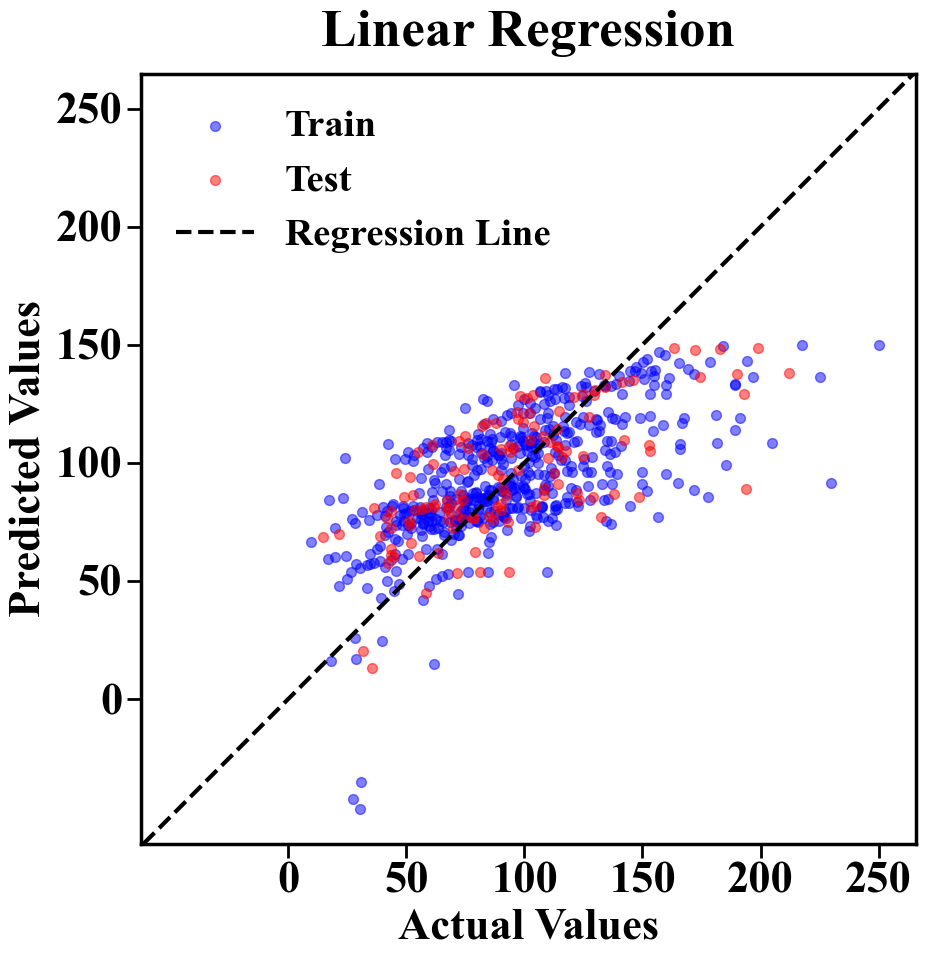

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.437779,22.446359,32.400998,29.433583,0.477845,22.507983,31.239787,28.537983


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression','output/figures/lr.png')

lr_metrics

[LibSVM]

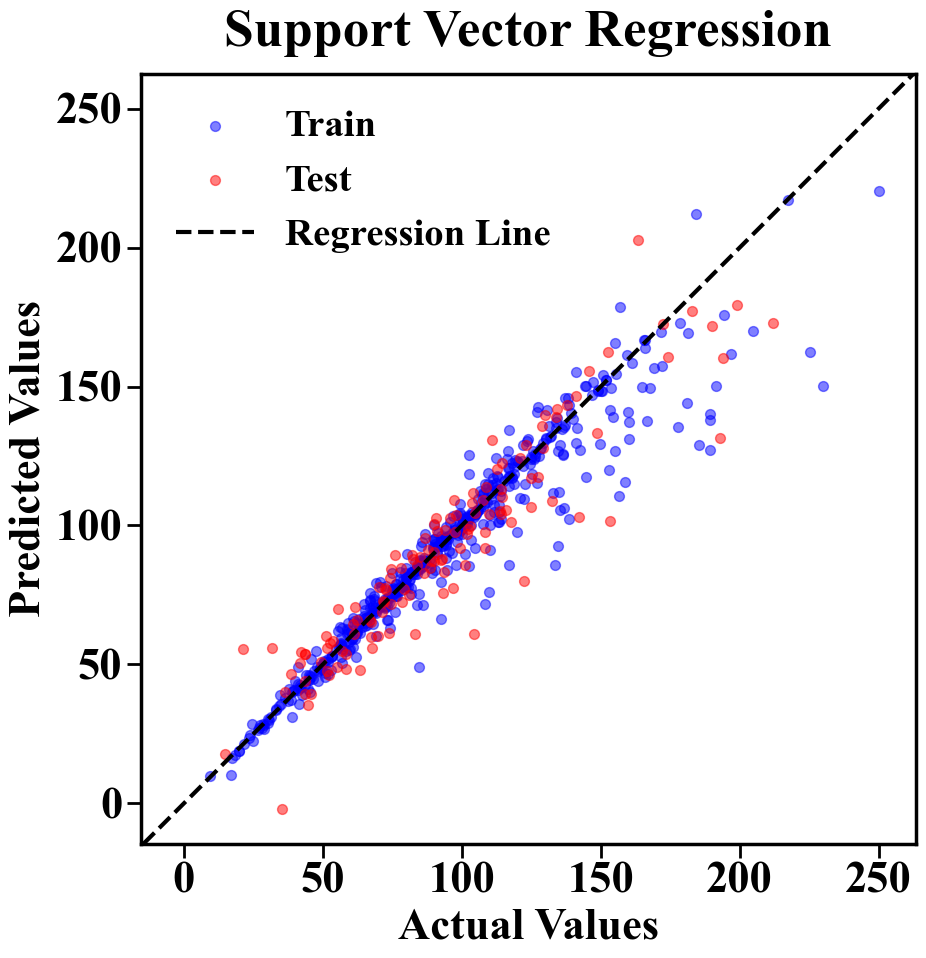

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,SVR,0.912497,5.816399,5.403543,11.61181,0.85655,10.237714,12.650384,14.958009


In [6]:
from sklearn.svm import SVR

svr = SVR(C=5, kernel='poly', degree=7, gamma='scale', coef0=6, epsilon=0.75, verbose=True)
svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'SVR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression', 'output/figures/svr.png')

svr_metrics

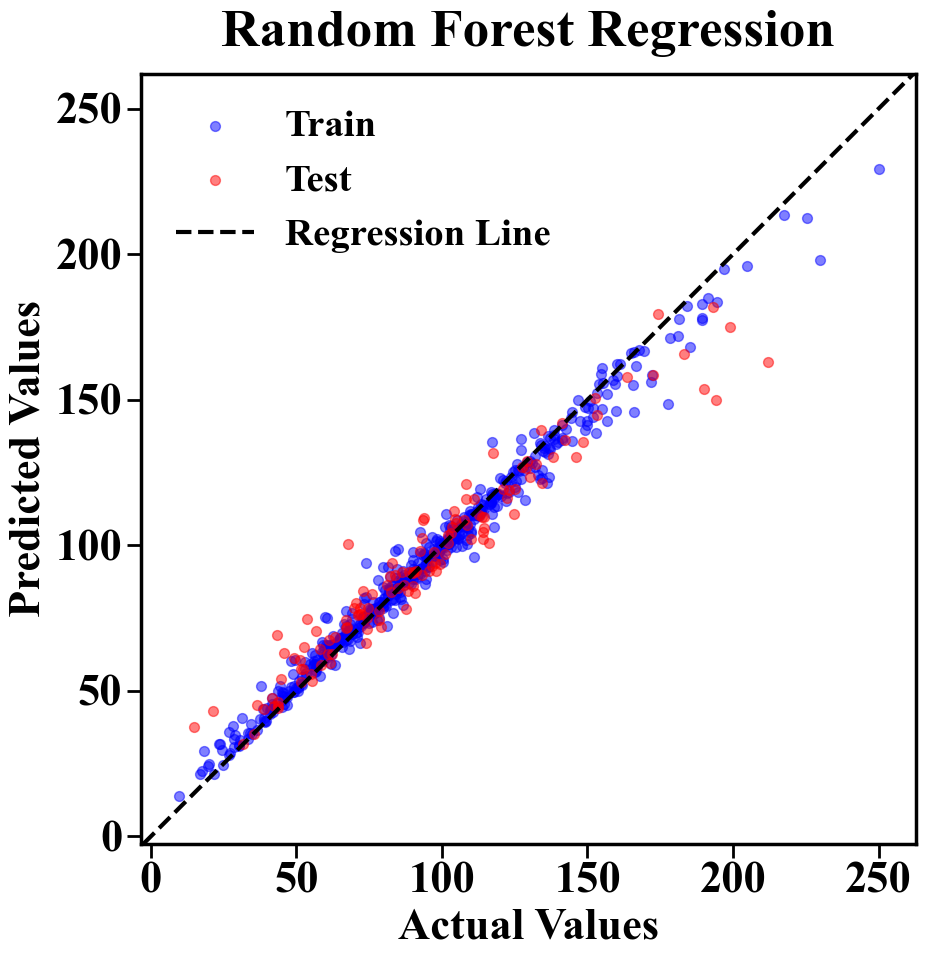

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Randon Forest,0.981335,3.584748,4.667015,5.362939,0.92133,7.547178,10.169603,11.077158


In [7]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=12,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=21)
rfr.fit(X_train_scaled, y_train)

y_train_pred = rfr.predict(X_train_scaled)
y_test_pred = rfr.predict(X_test_scaled)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Random Forest Regression','output/figures/rfr.png')

rfr_metrics

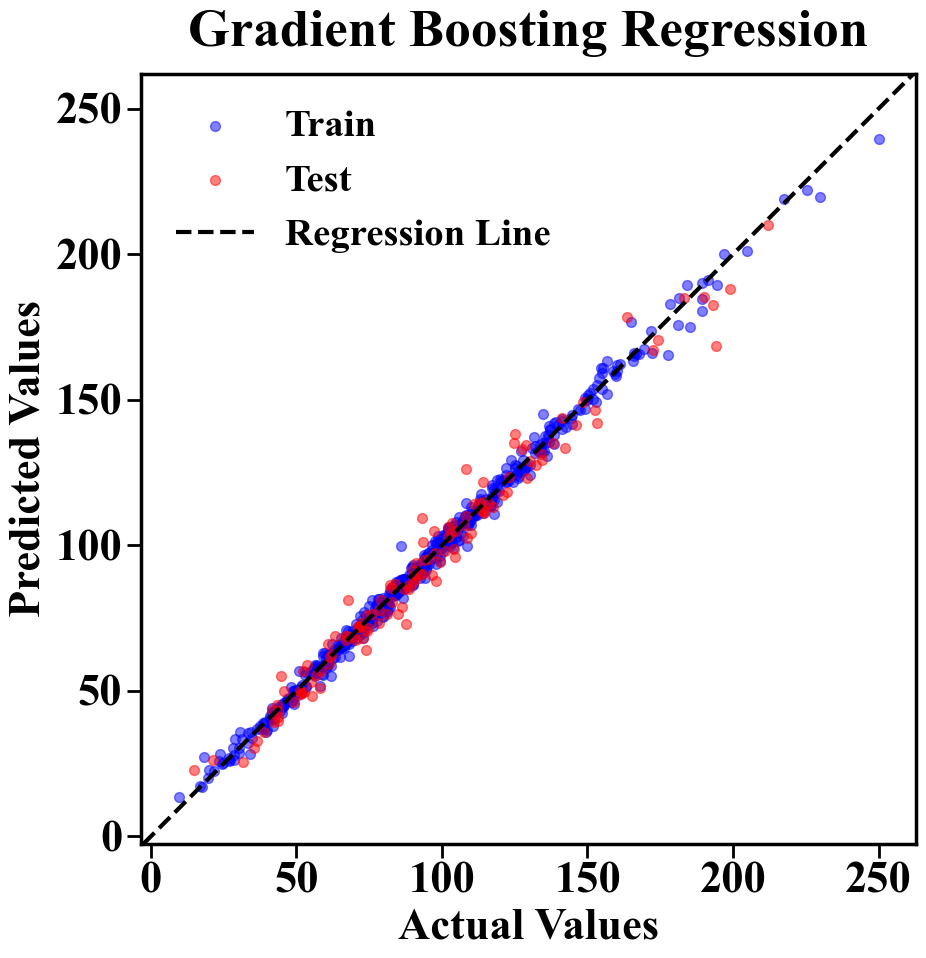

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,GBR,0.995004,2.014214,2.570208,2.774575,0.976692,4.430263,5.575606,6.029442


In [8]:

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100,
                                alpha=0.001,
                                learning_rate=0.18,
                                max_depth=8,
                                max_features=0.2,
                                min_samples_leaf=4,
                                min_samples_split=2,
                                subsample=0.7,
                                random_state=21)
gbr.fit(X_train_scaled, y_train)

y_train_pred = gbr.predict(X_train_scaled)
y_test_pred = gbr.predict(X_test_scaled)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'GBR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression','output/figures/gbr.png')

gbr_metrics

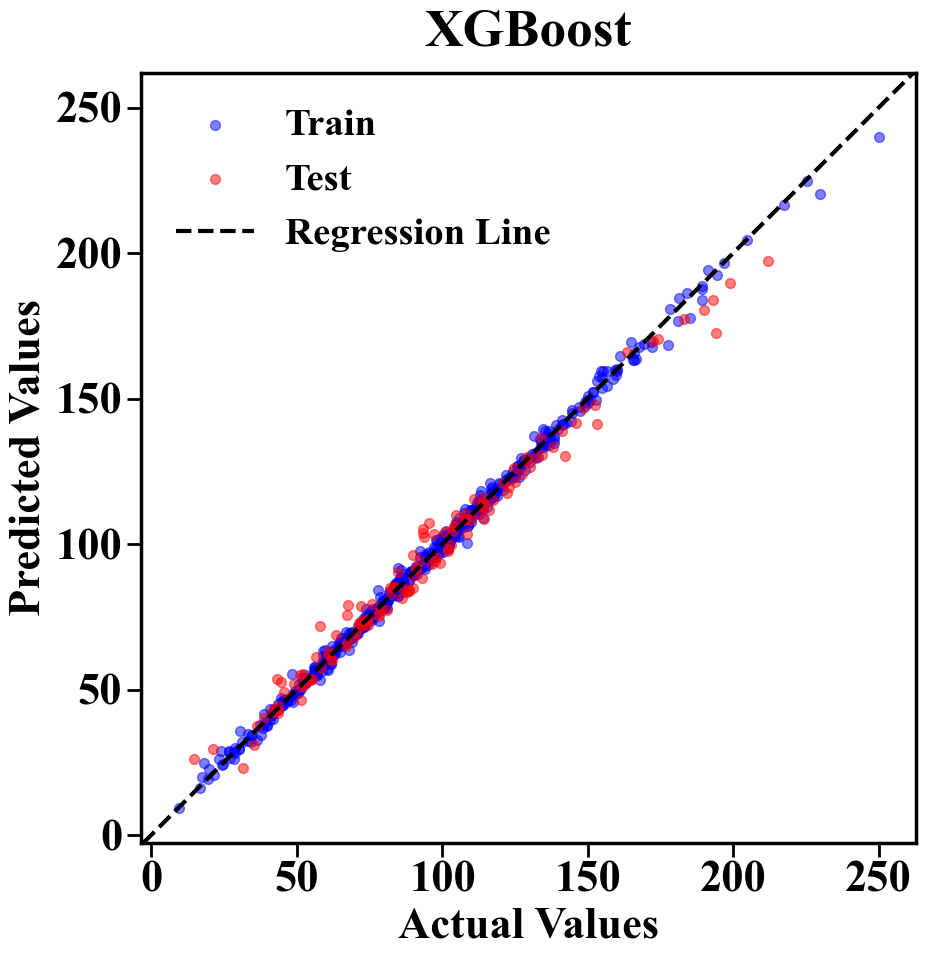

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.997127,1.516637,1.960229,2.103897,0.982217,3.841071,5.190394,5.266499


In [9]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100,
                   learning_rate=0.16,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.35,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.7,
                   random_state=21)
xgb.fit(X_train_scaled, y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost','output/figures/XGB.png')

xgb_metrics

Epoch 1/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 10038.6309 - mae: 92.3616 - val_loss: 10912.2188 - val_mae: 95.7309
Epoch 2/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10823.4512 - mae: 96.2159 - val_loss: 10892.8135 - val_mae: 95.6778
Epoch 3/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10204.7549 - mae: 93.6966 - val_loss: 10863.8291 - val_mae: 95.5979
Epoch 4/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10288.4883 - mae: 94.2732 - val_loss: 10820.5566 - val_mae: 95.4632
Epoch 5/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10096.5332 - mae: 93.9399 - val_loss: 10769.8232 - val_mae: 95.3176
Epoch 6/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9844.5615 - mae: 91.9189 - val_loss: 10715.1904 - val_mae: 95.1844
Epoch 7/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10046.1680 - mae: 93.7776 - val_loss: 10647.3643 - val_mae: 95.0099
Epoch 8/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9533.4668 - mae: 91.2637 - val_loss: 10569.6

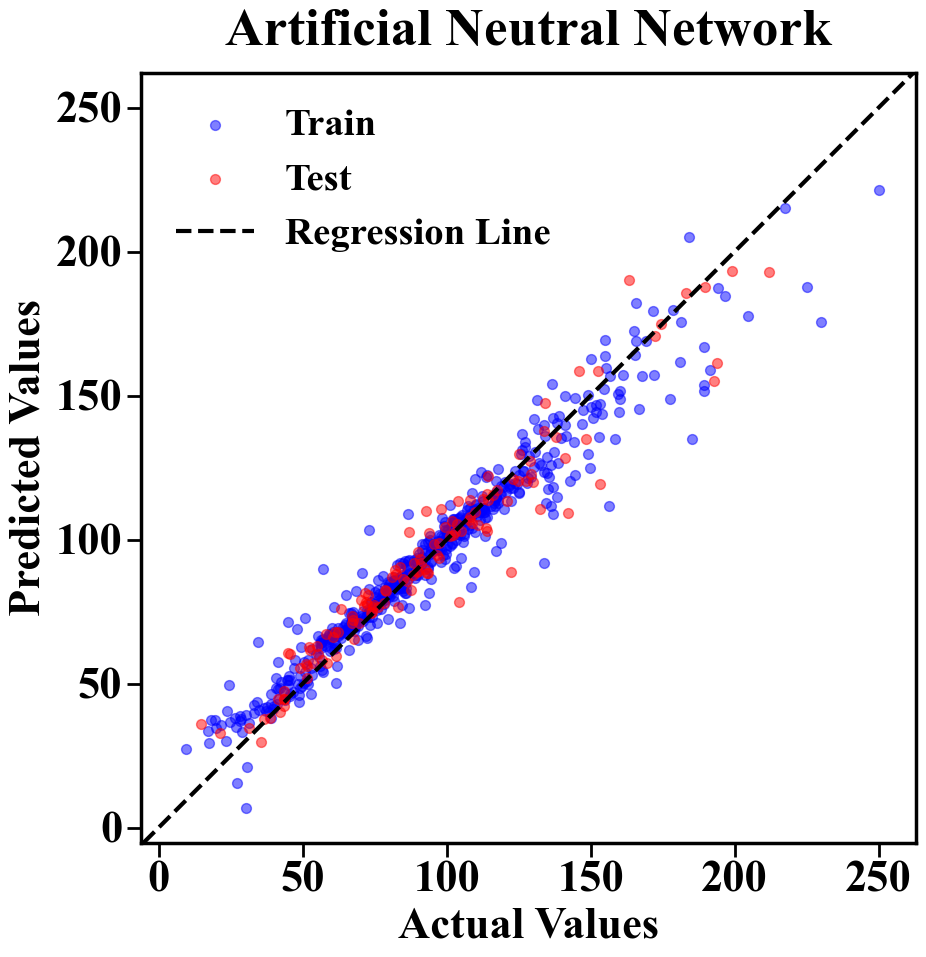

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,ANN,0.934847,6.648454,9.335522,10.019766,0.933362,6.707186,8.533003,10.194951


In [13]:
from tensorflow.keras.regularizers import l2
from keras.src.layers import BatchNormalization
from keras import Input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(25,)),  # 假设有25个输入特征
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1)  # 回归任务，输出层不使用激活函数
])

# 编译模型，指定优化器、损失函数和评价指标
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 初始化早停回调
early_stopper = EarlyStopping(
    monitor='val_loss',     # 监控验证集损失
    min_delta=0.005,        # 表示监控指标至少需要改善 0.001
    patience=50,            # 如果50个epoch内验证集损失没有改善，则提前停止训练
    verbose=1,              # 输出早停信息
    mode='min',             # 监控的指标是损失，应该减小
    restore_best_weights=True  # 训练结束后，模型权重回滚到最佳状态
)

# 训练模型
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 使用20%的数据作为验证集
    epochs=2000,  # 最大训练轮数
    callbacks=[early_stopper],  # 使用早停机制
    verbose=1  # 输出训练信息
)

# 预测训练集和测试集
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

ann_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'ANN')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Artificial Neutral Network','output/figures/ann.png')

ann_metrics

In [16]:
metrics = pd.concat([svr_metrics, rfr_metrics, xgb_metrics, ann_metrics])
metrics_rounded = metrics.round(3)
metrics_rounded.to_markdown('output/report/report_models.md', index=False, tablefmt='github')
metrics_rounded

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,SVR,0.912,5.816,5.404,11.612,0.857,10.238,12.650,14.958
0,Randon Forest,0.981,3.585,4.667,5.363,0.921,7.547,10.170,11.077
0,XGBoost,0.997,1.517,1.960,2.104,0.982,3.841,5.190,5.266
0,ANN,0.935,6.648,9.336,10.020,0.933,6.707,8.533,10.195
